In [1]:
! pip install transformers --quiet
! pip install datasets --quiet
! pip install umap-learn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datasets import list_datasets
import torch

In [3]:
datasets = list_datasets()

print(f'There are {len(datasets)} datasets currently on the hub')
print(f'The first 10 are: {datasets[:15]}')

There are 17511 datasets currently on the hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews', 'allocine', 'alt', 'amazon_polarity', 'amazon_reviews_multi', 'amazon_us_reviews']


In [4]:
metadata = list_datasets(with_details=True)[datasets.index('emotion')]

print('Description: ', metadata.description)
print('Citation: ', '\n'.join(metadata.citation.split('\n')[:8])) # shows the top 8 lines in the citation

Description:  Emotion is a dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise. For more detailed information please refer to the paper.
Citation:  @inproceedings{saravia-etal-2018-carer,
    title = "{CARER}: Contextualized Affect Representations for Emotion Recognition",
    author = "Saravia, Elvis  and
      Liu, Hsien-Chi Toby  and
      Huang, Yen-Hao  and
      Wu, Junlin  and
      Chen, Yi-Shin",
    booktitle = "Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing",


/usr/local/lib/python3.8/dist-packages/huggingface_hub/utils/_deprecation.py:233: FutureWarning: 'list_datasets' currently returns a list of objects but is planned to be a generator starting from version 0.14 in order to implement pagination. Please avoid to use `list_datasets(...).__getitem__` or explicitly convert the output to a list first with `list(iter(list_datasets)(...))`.
  warnings.warn(self._deprecation_msg.format(attr_name=attr_name), FutureWarning)


In [5]:
# let's focus on the dataset we want to work with
from datasets import load_dataset

emotions = load_dataset('emotion')
emotions

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train = emotions['train']
valid = emotions['validation']
test = emotions['test']


train

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

## EDA

In [7]:
train[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [8]:
train.column_names

['text', 'label']

In [9]:
train.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [10]:
train[15:25]

{'text': ['i do not feel reassured anxiety is on each side',
  'i didnt really feel that embarrassed',
  'i feel pretty pathetic most of the time',
  'i started feeling sentimental about dolls i had as a child and so began a collection of vintage barbie dolls from the sixties',
  'i now feel compromised and skeptical of the value of every unit of work i put in',
  'i feel irritated and rejected without anyone doing anything or saying anything',
  'i am feeling completely overwhelmed i have two strategies that help me to feel grounded pour my heart out in my journal in the form of a letter to god and then end with a list of five things i am most grateful for',
  'i have the feeling she was amused and delighted',
  'i was able to help chai lifeline with your support and encouragement is a great feeling and i am so glad you were able to help me',
  'i already feel like i fucked up though because i dont usually eat at all in the morning'],
 'label': [1, 0, 0, 0, 4, 3, 4, 1, 1, 3]}

In [11]:
train['text'][15:25]

['i do not feel reassured anxiety is on each side',
 'i didnt really feel that embarrassed',
 'i feel pretty pathetic most of the time',
 'i started feeling sentimental about dolls i had as a child and so began a collection of vintage barbie dolls from the sixties',
 'i now feel compromised and skeptical of the value of every unit of work i put in',
 'i feel irritated and rejected without anyone doing anything or saying anything',
 'i am feeling completely overwhelmed i have two strategies that help me to feel grounded pour my heart out in my journal in the form of a letter to god and then end with a list of five things i am most grateful for',
 'i have the feeling she was amused and delighted',
 'i was able to help chai lifeline with your support and encouragement is a great feeling and i am so glad you were able to help me',
 'i already feel like i fucked up though because i dont usually eat at all in the morning']

In [12]:
# let's convert to a pandas dataframe
# this does not change the underlying dataformat 

emotions.set_format(type='pandas')
df = emotions['train'][:]
df.sample(10)

,text,label
4714,im destashing a couple cuts of fabric that id ...,0
10934,i feel a little brave and venture out of my co...,1
13190,i last talked to her and now i feel all bouncy...,1
3984,i take a look as i try to get used to the feel...,1
2000,i provided dinner alcohol and a place to crash...,0
13441,i feel the energetics of the cinnamon tree is ...,2
3023,i feel a despairing sadness because after so m...,0
2663,i feel like i am being deprived of oxygen,0
12496,i have never met in real life but feel super b...,1
6146,i party wah wah wah nationalism blah yay aryan...,1


In [13]:
def label_int2str(row, split):
  return emotions[split].features['label'].int2str(row)

In [14]:
df['label_name'] = df['label'].apply(label_int2str, split='train')
df.sample(10)

,text,label,label_name
6089,when i was about six years old,4,fear
4476,i still feel a craving for sweet food,1,joy
10015,i do feel lonely at times and at times i still...,0,sadness
14701,when my close friend was involved in an accide...,0,sadness
6206,i cant help it because of the way i feel aroun...,0,sadness
1994,i could already feel the difference in strengt...,4,fear
517,i feel your innocent love,1,joy
10640,i love when everything looks so bright even i ...,0,sadness
2465,i look at it like if someone doesnt like me or...,0,sadness
10099,i love they way they feel in my hand im sort o...,5,surprise


In [15]:
df['label_name'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label_name, dtype: int64

Text(0.5, 1.0, 'Category counts')

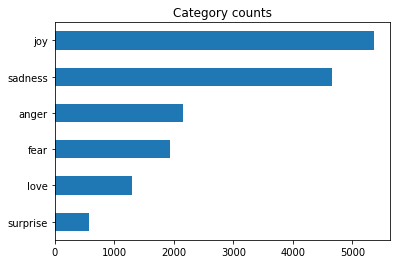

In [16]:
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('Category counts')

In [17]:
df['Words Per Tweet'] = df['text'].str.split().apply(len)
df.sample(10)

,text,label,label_name,Words Per Tweet
8038,i am feeling good and the runs feel normal,1,joy,9
3164,im feeling a much more festive with the tree in,1,joy,10
15304,i still feel devastated,0,sadness,4
12454,ive been feeling depressed anxious and unhappy,0,sadness,7
7786,i could feel what was going to happen at the v...,4,fear,17
8337,i wear makeup not only to reflect how beautifu...,4,fear,34
4587,i breaking skin feels like and it s not pleasant,1,joy,10
8695,i would love to go into this for two reasons i...,1,joy,36
11180,i lie to myself to feel like i am trusting but...,1,joy,28
1181,i email authors about interviews i feel a litt...,4,fear,10


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0, '')

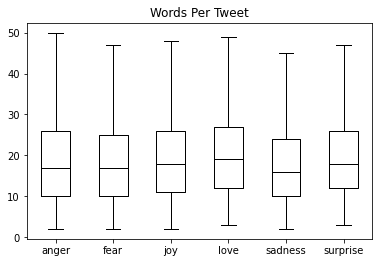

In [18]:
df.boxplot('Words Per Tweet', by='label_name', grid=False, showfliers = False, color ='black')
plt.suptitle('')
plt.xlabel('')

In [19]:
 # to continue working with the dataset let's reset the format
emotions.reset_format()

## Tokenization

In [20]:
from transformers import AutoTokenizer

model_name = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [21]:
# let's see some things about the tokenizer
print(f"Vocab Size: {tokenizer.vocab_size}")
print(f"Model Input names: {tokenizer.model_input_names}")
print(f"Special tokens: {tokenizer.special_tokens_map}")
print(f"Model max seq length: {tokenizer.model_max_length}")

Vocab Size: 30522
Model Input names: ['input_ids', 'attention_mask']
Special tokens: {'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}
Model max seq length: 512


In [22]:
encoded_str = tokenizer.encode('this is a simpletest')
encoded_str

[101, 2023, 2003, 1037, 3722, 22199, 102]

In [23]:
for token in encoded_str:
  print(token, tokenizer.decode(token))

101 [CLS]
2023 this
2003 is
1037 a
3722 simple
22199 ##test
102 [SEP]


In [24]:
text = 'Tokenizing is an important part of NLP'
encoded_text = tokenizer(text)
encoded_text

{'input_ids': [101, 19204, 6026, 2003, 2019, 2590, 2112, 1997, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

As we see above, the .encode method only returns values for the input_ids while calling the tokenizer directly on the text returns values for the input_ids as well as for the attention_mask.

In [25]:
# we can also convert the ids back to tokens and back to a single string
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)
print(tokenizer.convert_tokens_to_string(tokens))

['[CLS]', 'token', '##izing', 'is', 'an', 'important', 'part', 'of', 'nl', '##p', '[SEP]']
[CLS] tokenizing is an important part of nlp [SEP]


In [26]:
def tokenize(batch):
  return tokenizer(batch['text'], padding = True, truncation=True)

  # let's tokenize for a few entries of the emotions corpus
tokenize(emotions['train'][:3])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102], [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}

In [27]:
# let's tokenize for the entire emotions corpus

emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [28]:
emotions_encoded['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

## Training a Text Classifier

We could use the model in two ways - for feature extraction and for finetuning.
In the first part, we'll be extract the features using the pretrained model and then train the model with a simple classifier.

In the second part, we'll finetune the model.

In [29]:
from transformers import AutoModel

model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Feature Extraction

Let's see how to extract the last hidden state from the pretrained model for a single text input and then extend to the whole dataset.

In [30]:
# for tensorflow tensors
text = "this is a test"
inputs = tokenizer.encode(text, return_tensors = 'tf')
print(inputs.shape) # (batch_size, n_tokens)

inputs

(1, 6)


<tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[ 101, 2023, 2003, 1037, 3231,  102]], dtype=int32)>

In [31]:
text = 'this is a test'
inputs = tokenizer.encode(text, return_tensors = 'pt') # encodes text and convert to pytorch tensors
print(inputs.shape)
print(inputs) # as before

torch.Size([1, 6])
tensor([[ 101, 2023, 2003, 1037, 3231,  102]])


In [32]:
# load the input on the GPU and extract the last hidden state
text = 'this is a test'

inputs = tokenizer(text, return_tensors = 'pt')
inputs = {k:v.to(device) for k, v in inputs.items()}

with torch.no_grad():
  outputs = model(**inputs)
outputs

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)

In [33]:
outputs.last_hidden_state.shape

torch.Size([1, 6, 768])

In [34]:
# this can also be done as below
text = 'this is a test'
text_tensor = tokenizer.encode(text, return_tensors='pt').to(device)
output = model(text_tensor)
output.last_hidden_state.shape # shape (batch_size, n_tokens, hidden_dim)

torch.Size([1, 6, 768])

### For a batch

In [35]:
def extract_hidden_states(batch):
    # place the model inputs on the GPU
    inputs = {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}

    # extract the states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state

    return {'hidden_state': last_hidden_state[:, 0].cpu().numpy()}

In [36]:
emotions_encoded.set_format('torch', columns = ['input_ids', 'attention_mask', 'label'])
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [37]:
emotions_hidden['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'hidden_state': Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None)}

We will use the hidden state as features and labels as targets 

In [38]:
X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])

y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])

In [39]:
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [40]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_train) # UMAP works best when features are in the [0,1] interval
mapper = UMAP(n_components=2, metric='cosine').fit(X_scaled)
df_emb = pd.DataFrame(mapper.embedding_, columns=['X', 'Y'])
df_emb['label'] = y_train
display(df_emb.head())

,X,Y,label
0,4.127719,7.068985,0
1,-3.154000,6.213045,0
2,5.090667,3.604701,3
3,-2.391290,3.996548,2
4,-3.369098,4.186911,3


In [41]:
df_emb['label'].value_counts()

1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: label, dtype: int64

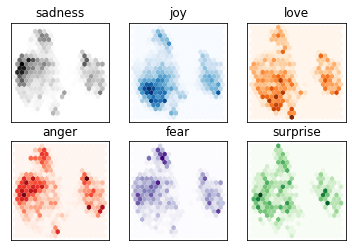

In [42]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
cmaps = ['Greys', 'Blues', 'Oranges', 'Reds', 'Purples', 'Greens']
labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f'label == {i}')
  axes[i].hexbin(df_emb_sub['X'], df_emb_sub['Y'], cmap = cmap, gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])

Let's train a Simple Classifier on the features extracted

In [43]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(n_jobs=-1, penalty='none')
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.605

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize='true')
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
  disp.plot(cmap='Blues', values_format = '.2f', ax = ax, colorbar = False)
  plt.title('Normalized confusion matrix')

  plt.show()

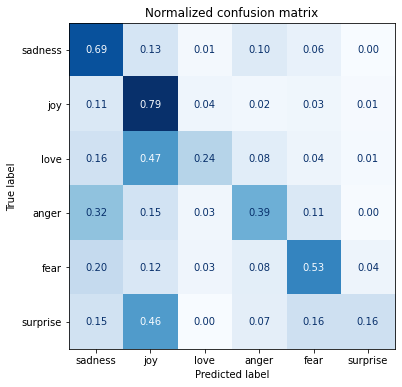

In [45]:
y_preds = lr_clf.predict(X_valid)

plot_confusion_matrix(y_preds, y_valid, labels)

From the Confusion matrix above, we see that anger and fear (3 & 4) are most often confused with sadness(0). Also, love and surprise (2 and 5) are most often confused with joy (1)

In [46]:
print(classification_report(y_valid, y_preds, target_names = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']))

              precision    recall  f1-score   support

     sadness       0.60      0.69      0.64       550
         joy       0.68      0.79      0.73       704
        love       0.47      0.24      0.31       178
       anger       0.49      0.39      0.43       275
        fear       0.52      0.53      0.53       212
    surprise       0.42      0.16      0.23        81

    accuracy                           0.60      2000
   macro avg       0.53      0.47      0.48      2000
weighted avg       0.59      0.60      0.59      2000



### Finetuning Transformers

In [47]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_name, num_labels = num_labels).to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [48]:
# we set the format to be a torch.Tensor, amd we're using only the columns as below
emotions_encoded.set_format('torch', columns = ['input_ids', 'attention_mask', 'label'])

In [49]:
emotions['train']['text'][0]

'i didnt feel humiliated'

In [50]:
emotions_encoded['train'][0]

{'label': tensor(0),
 'input_ids': tensor([  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0

In [51]:
emotions_encoded['train'][0]['input_ids'].shape

torch.Size([87])

In [52]:
# Define the Performance metrics
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average='weighted')
  acc = accuracy_score(labels, preds)

  return {'accuracy': acc, 'f1': f1}

In [53]:
# Train the model
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded['train'])//batch_size
training_args = TrainingArguments(output_dir = 'results', num_train_epochs=2, 
                                  learning_rate=2e-5, per_device_train_batch_size = batch_size, 
                                  per_device_eval_batch_size= batch_size, load_best_model_at_end= True, 
                                  metric_for_best_model='f1', weight_decay=0.01, 
                                  evaluation_strategy='epoch', disable_tqdm = False, 
                                  logging_steps = logging_steps, save_strategy='epoch')

In [54]:
trainer = Trainer(model = model, args = training_args, compute_metrics= compute_metrics, 
                  train_dataset = emotions_encoded['train'], 
                  eval_dataset = emotions_encoded['validation'])
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 16000
  Num Epochs = 2
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 500
  Number of trainable parameters = 66958086


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.832800,0.326650,0.906500,0.902150
2,0.261600,0.223448,0.925500,0.925328


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 64
Saving model checkpoint to results/checkpoint-250
Configuration saved in results/checkpoint-250/config.json
Model weights saved in results/checkpoint-250/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 64
Saving model checkpoint to results/checkpoint-500
Configuration saved in results/checkpoint-500/config.json
Model weights saved in results/checkpo

TrainOutput(global_step=500, training_loss=0.547216323852539, metrics={'train_runtime': 240.7101, 'train_samples_per_second': 132.94, 'train_steps_per_second': 2.077, 'total_flos': 720342861696000.0, 'train_loss': 0.547216323852539, 'epoch': 2.0})

In [55]:
results = trainer.evaluate()
results

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 64


{'eval_loss': 0.22344821691513062,
 'eval_accuracy': 0.9255,
 'eval_f1': 0.9253282948982087,
 'eval_runtime': 4.3535,
 'eval_samples_per_second': 459.404,
 'eval_steps_per_second': 7.35,
 'epoch': 2.0}

In [56]:
preds = trainer.predict(emotions_encoded['validation'])
preds.metrics

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 2000
  Batch size = 64


{'test_loss': 0.22344821691513062,
 'test_accuracy': 0.9255,
 'test_f1': 0.9253282948982087,
 'test_runtime': 4.0271,
 'test_samples_per_second': 496.638,
 'test_steps_per_second': 7.946}

In [57]:
y_preds = np.argmax(preds.predictions, axis=1)
y_preds

array([0, 0, 2, ..., 1, 2, 1])

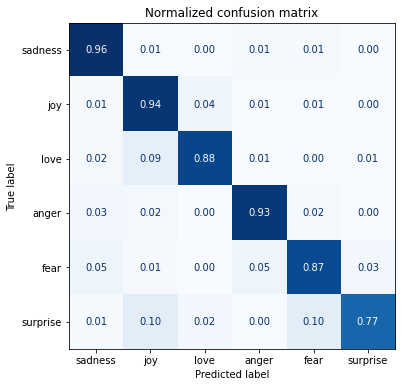

In [58]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [59]:
print(classification_report(y_valid, y_preds, target_names= ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']))

              precision    recall  f1-score   support

     sadness       0.95      0.96      0.96       550
         joy       0.95      0.94      0.95       704
        love       0.83      0.88      0.86       178
       anger       0.91      0.93      0.92       275
        fear       0.88      0.87      0.88       212
    surprise       0.90      0.77      0.83        81

    accuracy                           0.93      2000
   macro avg       0.90      0.89      0.90      2000
weighted avg       0.93      0.93      0.93      2000



## Making Predictions

In [60]:
custom_tweet = 'i saw a movie today and it was really good'
input_tensor = tokenizer.encode(custom_tweet, return_tensors='pt').to(device)
logits = model(input_tensor).logits

logits

tensor([[-0.7461,  3.8871, -0.8638, -1.0920, -1.2350, -1.0717]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [61]:
softmax = torch.nn.Softmax(dim=1)
probs = softmax(logits)[0]
probs = probs.cpu().detach().numpy()

probs

array([0.00936511, 0.9631759 , 0.00832537, 0.0066271 , 0.00574394,
       0.00676257], dtype=float32)

Text(0, 0.5, 'Class probablity (%)')

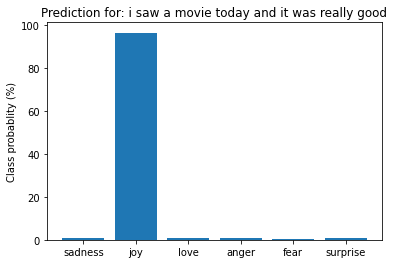

In [62]:
plt.bar(labels, 100*probs, color='C0')
plt.title(f'Prediction for: {custom_tweet}')
plt.ylabel('Class probablity (%)')

In [66]:
# let's wrap the steps in a single function

def evaluate(sentence):
    """Returns the model predicted sentiment of the given sentence"""
    input_tensor = tokenizer.encode(sentence, return_tensors='pt').to(device)
    logits = model(input_tensor).logits

    softmax_layer = torch.nn.Softmax(dim = 1)
    probs = softmax(logits)
    probs = (probs[0]).cpu().detach().numpy()
    index = np.argmax(probs)

    predictions = labels[index]

    return predictions

In [67]:
custom_tweet = 'i saw a movie today and it was really good'
evaluate(custom_tweet)

'joy'

In [68]:
sentence = "Unlike recent years, Frank spent the new year's eve in a bar with different women."
evaluate(sentence)

'joy'

### Model analysis

In [69]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
  input_ids = torch.tensor(batch['input_ids'], device = device)
  attention_mask = torch.tensor(batch['attention_mask'], device=device)
  labels = torch.tensor(batch['label'], device=device)

  with torch.no_grad():
    output = model(input_ids, attention_mask)
    pred_label = torch.argmax(output.logits, axis=-1)
    loss = cross_entropy(output.logits, labels, reduction='none')

  batch['predicted_label'] = pred_label.cpu().numpy()
  batch['loss'] = loss.cpu().numpy()
  return batch

In [70]:
emotions_encoded.reset_format()
emotions_encoded['validation'] = emotions_encoded['validation'].map(forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/125 [00:00<?, ?ba/s]

In [71]:
emotions_encoded.set_format('pandas')
cols = ['text', 'label', 'predicted_label', 'loss']
df_test = emotions_encoded['validation'][:][cols]
df_test['label'] = df_test['label'].apply(label_int2str, split='test')
df_test['predicted_label'] = (df_test['predicted_label'].apply(label_int2str, split='test'))

In [72]:
df_test.head(10)

,text,label,predicted_label,loss
0,im feeling quite sad and sorry for myself but ...,sadness,sadness,0.027158
1,i feel like i am still looking at a blank canv...,sadness,sadness,0.034742
2,i feel like a faithful servant,love,love,0.521629
3,i am just feeling cranky and blue,anger,anger,0.036657
4,i can have for a treat or if i am feeling festive,joy,joy,0.020541
5,i start to feel more appreciative of what god ...,joy,joy,0.038306
6,i am feeling more confident that we will be ab...,joy,joy,0.027627
7,i feel incredibly lucky just to be able to tal...,joy,joy,0.020591
8,i feel less keen about the army every day,joy,joy,0.026074
9,i feel dirty and ashamed for saying that,sadness,sadness,0.025673


In [73]:
emotions['test'][0]

{'text': 'im feeling rather rotten so im not very ambitious right now',
 'label': 0}

In [74]:
emotions['validation'][0]

{'text': 'im feeling quite sad and sorry for myself but ill snap out of it soon',
 'label': 0}

In [75]:
df_test.sort_values('loss', ascending=False).head(10)

,text,label,predicted_label,loss
1963,i called myself pro life and voted for perry w...,joy,sadness,5.255318
1274,i am going to several holiday parties and i ca...,joy,sadness,5.182933
1950,i as representative of everything thats wrong ...,surprise,sadness,5.121119
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.066777
1500,i guess we would naturally feel a sense of lon...,anger,sadness,5.015575
882,i feel badly about reneging on my commitment t...,love,sadness,4.862054
1509,i guess this is a memoir so it feels like that...,joy,fear,4.828791
765,i feel super awkward and out of place right now,joy,sadness,4.716296
1801,i feel that he was being overshadowed by the s...,love,sadness,4.656129
465,i would eventually go in to these stores but i...,joy,fear,4.627192


In [76]:
df_test.sort_values('loss', ascending=True).head(10)

,text,label,predicted_label,loss
1618,i had a good feeling about the presentation an...,joy,joy,0.018617
19,i had lunch with an old friend and it was nice...,joy,joy,0.019422
669,i am not feeling very joyful today its been a ...,joy,joy,0.019433
856,i feel is more energetic in urban singapore th...,joy,joy,0.019762
1873,i feel practically virtuous this month i have ...,joy,joy,0.019768
1012,i definitely succumbed to pre holiday sales bu...,joy,joy,0.019854
604,i don t like to use the h word recklessly but ...,joy,joy,0.020018
1884,i don t exactly feel sociable still,joy,joy,0.020106
1101,im feeling good i increase,joy,joy,0.020193
578,i got to christmas feeling positive about the ...,joy,joy,0.020230


In [77]:
trainer.save_model('models/distilbert-emotion')
tokenizer.save_pretrained('models/distilbert-emotion')

Saving model checkpoint to models/distilbert-emotion
Configuration saved in models/distilbert-emotion/config.json
Model weights saved in models/distilbert-emotion/pytorch_model.bin
tokenizer config file saved in models/distilbert-emotion/tokenizer_config.json
Special tokens file saved in models/distilbert-emotion/special_tokens_map.json


('models/distilbert-emotion/tokenizer_config.json',
 'models/distilbert-emotion/special_tokens_map.json',
 'models/distilbert-emotion/vocab.txt',
 'models/distilbert-emotion/added_tokens.json',
 'models/distilbert-emotion/tokenizer.json')